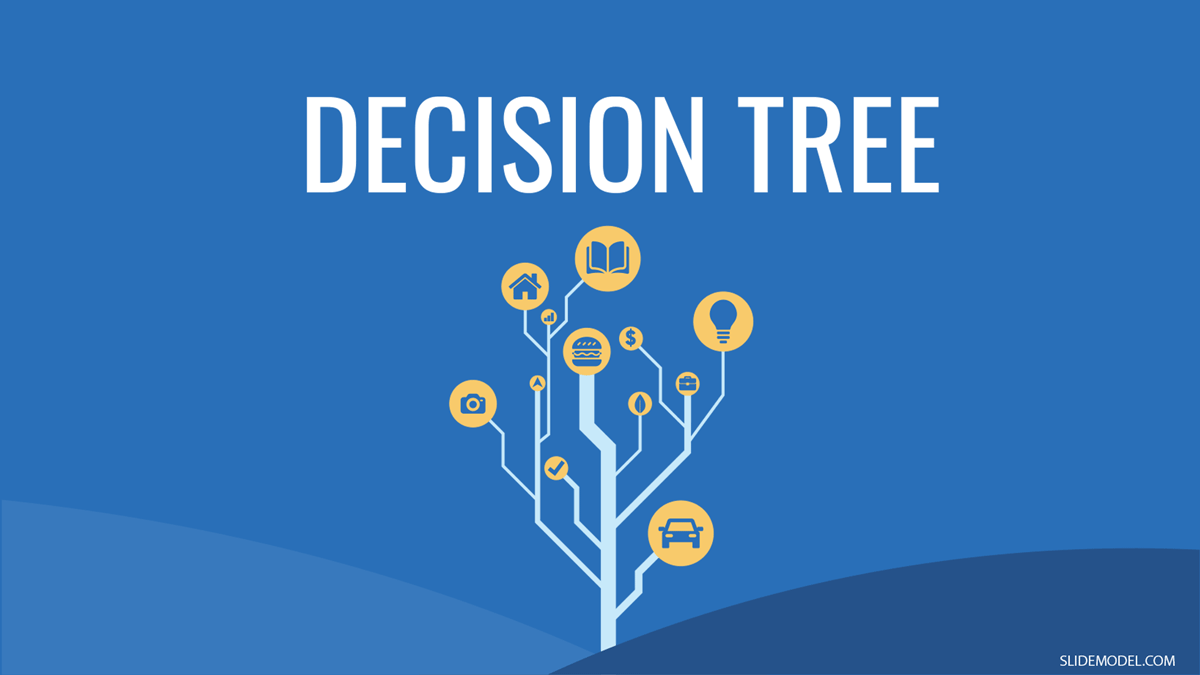

<div class = "alert alert-danger">
<h1>Importing Dependencies</h1>
</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div class = "alert alert-info">
    
<h1><strong>Introduction</strong></h1>
<br>
<h2>Decision Trees</h2>
<ui><li>Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are powerful algorithms, capable of fitting complex datasets.</li></ui> 

<ui><li>Decision trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.</li></ui>
    
<h2>Training and Visualizing Decision Trees</h2>

<ui><li>To understand Decision Trees, let’s build one and take a look at how it makes predictions. The following code trains a DecisionTreeClassifier on the iris dataset:</li></ui>
    
</div>

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf, 
                           out_file=None, 
                           feature_names=iris.feature_names[2:],  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)
graph.format = 'png'  
graph.render("/kaggle/working/iris_decision_tree", view=False)  

'/kaggle/working/iris_decision_tree.png'

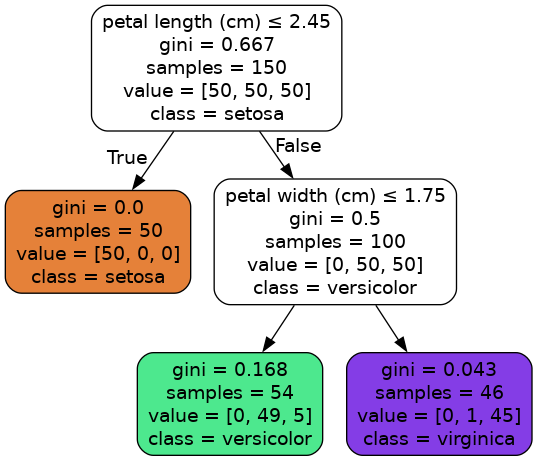

In [22]:
file_path = graph.render("/kaggle/working/iris_decision_tree", view=False)
from IPython.display import Image

# Display the image in the notebook
Image(file_path)

<div class = "alert alert-info">
<h1>Making Predictions</h1>

<ui><li>Let’s see how the tree represented in the above figure make predictions. Suppose you find an iris flower and you want to classify it. You start at the root node, this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move to the root’s left child node. In this case, it is a leaf node, so it does not ask any questions, simply at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris setosa.</li></ui>

<ui><li>Now suppose you find another flower, and this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node, which is not a leaf node, so the node asks another question, is the petal width smaller than 1.75 cm? If it is, then your flower is mostly an Iris versicolor. If not, it is likely an Iris virginica. It’s really that simple.</li></ui>

<ui><li>One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.</li></ui>
</div>
    
    
#### **Decision Tree decision boundaries**
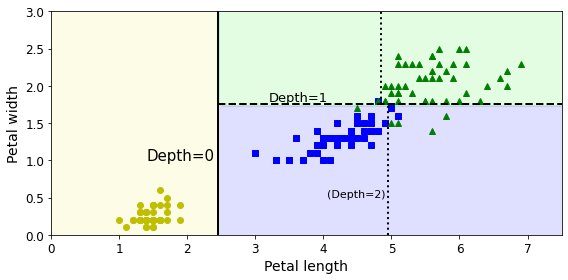

<div class = "alert alert-warning">
<h2>Estimating Class Probabilities</h2>

<ui><li>Decision Trees can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.</li></ui>


<ui><li>And if you ask it to predict the class, it should output Iris versicolor (class 1) because it has the highest probability. Let’s check this:</li></ui>

</div>

In [25]:
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [26]:
tree_clf.predict([[5, 1.5]])


array([1])


<div class = "alert alert-danger">
<h2>The CART Training Algorithm</h2>

<p>Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The algorithm works by first splitting the
training set into two subsets using a single feature k and a threshold tk
 (e.g., “petal
length ≤ 2.45 cm”). How does it choose k and tk
? It searches for the pair (k, tk
) that
produces the purest subsets (weighted by their size).</p>
</div>

### **CART cost function for classification**

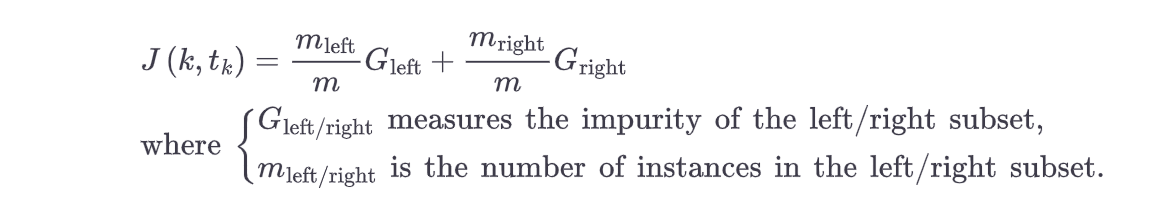

<div class = "alert alert-danger">

<ui><li>As you can see, the CART algorithm is a greedy algorithm: it greed‐
ily searches for an optimum split at the top level, then repeats the
process at each subsequent level. It does not check whether or not
the split will lead to the lowest possible impurity several levels
    down.</li></ui>
    
<ui><li>A greedy algorithm often produces a solution that’s reasona‐
bly good but not guaranteed to be optimal.
Unfortunately, finding the optimal tree is known to be an NPComplete problem:2
 it requires O(exp(m)) time, making the prob‐
lem intractable even for small training sets. This is why we must
settle for a “reasonably good” solution.</li></ui>

</div>

<div class="alert alert-info">
<h1>Entropy</h1>

<ui><li>By default, the Gini impurity measure is used, but you can select the entropy impurity
measure instead by setting the criterion hyperparameter to "entropy".</li></ui>

<ui><li>In Machine Learning, entropy is frequently used as animpurity measure: a set’s entropy is zero when it contains instances of only one class.</li></ui>
</div>


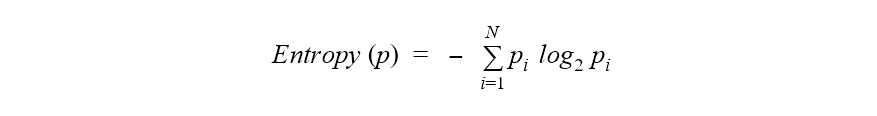

<div class = "alert alert-warning">
<h1>Gini Impurity</h1>

<ui><li>Gini impurity is a measure of how often a randomly chosen element from a set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.</li></ui>

<ui><li>It is a measure of how mixed the classes are in a dataset. A dataset with high Gini impurity is more mixed, while a dataset with low Gini impurity is more pure.</li></ui>

</div>


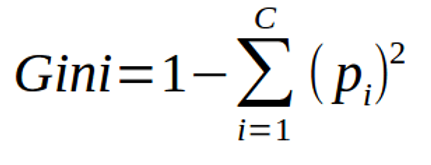

<div class = "alert alert-success">
     
<h2>Gini Impurity or Entropy?</h2>

So, should you use Gini impurity or entropy? The truth is, most of the time it does
not make a big difference: they lead to similar trees. Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.
    
</div>

<div class = "alert alert-info">
<h1>Regularization Hyperparameters</h1>

<ui><li>Decision Trees are nonparametric models, meaning they make few assumptions about the training data and can adapt closely to it, potentially leading to overfitting.</li></ui>

<ui><li>Regularization is used to avoid overfitting by restricting the tree's freedom during training.</li></ui>

<ui><li>The max_depth hyperparameter controls the maximum depth of the Decision Tree and helps in regularization.</li></ui>

<ui><li>Other hyperparameters like min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, and max_features can also be used to restrict the shape of the tree and regularize the model.</li></ui>

<ui><li>Some algorithms work by first training the Decision Tree without restrictions and then pruning unnecessary nodes. Pruning involves deleting nodes that do not provide statistically significant purity improvement.</li></ui>

<ui><li>Standard statistical tests like the chi-squared test (χ2 test) are used to estimate the probability (p-value) that the improvement is purely due to chance.</li></ui>

<ui><li>If the p-value is higher than a given threshold (typically 5%), the node is considered unnecessary and its children are deleted.</li></ui>

<ui><li>Pruning continues until all unnecessary nodes have been removed, resulting in a more regularized model that is less likely to overfit.</li></ui>

<ui><li>In the example with the moons dataset, the Decision Tree on the left (trained without restrictions) is overfitting, while the one on the right (trained with min_samples_leaf=4) is likely to generalize better.</li></ui>

<ui><li>By properly tuning the hyperparameters or using pruning techniques, Decision Trees can be regularized to achieve better generalization performance on unseen data and avoid overfitting.</li></ui>
    
</div>

#### **Regularization using min_samples_leaf**

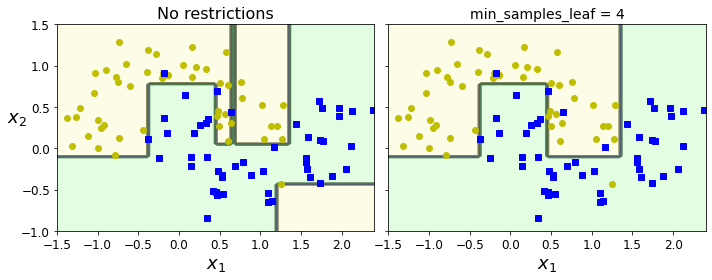

<div class = "alert alert-warning">
<h1>Regression</h1>

<p>Decision Trees are also capable of performing regression tasks. Let’s build a regres‐
sion tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy
    quadratic dataset with max_depth=2:</p>
    
</div>

In [27]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [28]:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [29]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### **Predictions of two Decision Tree regression models**

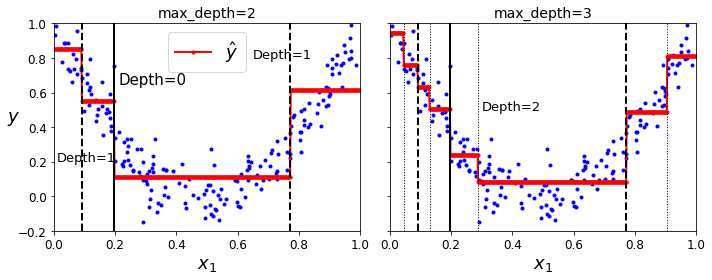

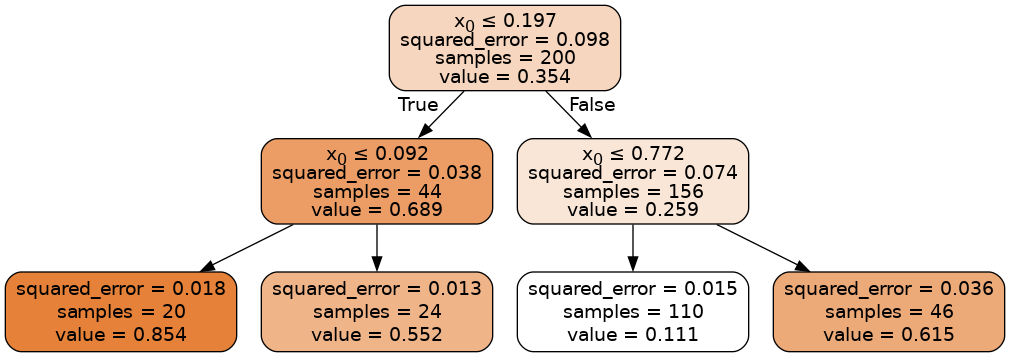

In [31]:
dot_data = export_graphviz(tree_reg, 
                           out_file=None, 
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)
graph.format = 'png'  # Set the output format to PNG
file_path = graph.render("reg_tree", view=False)

# Display the image in the notebook
Image(file_path)


<div class = "alert alert-danger">

<h2>CART algorithm</h2>
<p>The CART algorithm works mostly the same way as earlier, except that instead of try‐
ing to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE.</p>

</div>


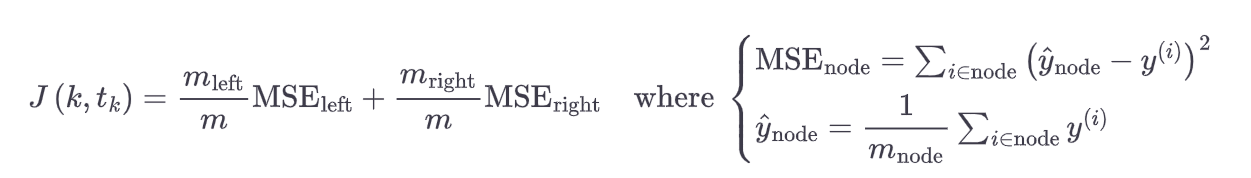


<div class = "alert alert-danger">

<p>Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization (i.e., using the default hyperpara‐
meters), you get the predictions on the left . These predictions are obvi‐
ously overfitting the training set very badly. Just setting min_samples_leaf=10 results
    in a much more reasonable model, represented on the right</p>
</div>
    
    
#### **Regularizing a Decision Tree regressor**
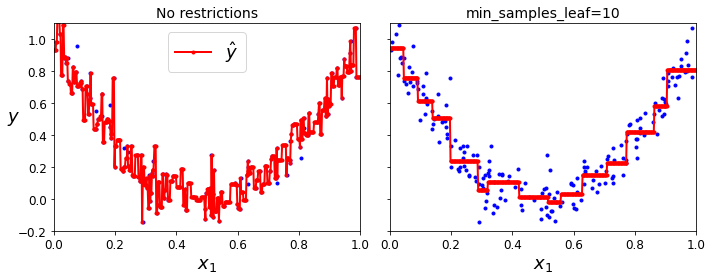

<div class = "alert alert-success">


<h1>Instability</h1>

<p>Hopefully by now you are convinced that Decision Trees have a lot going for them:
they are simple to understand and interpret, easy to use, versatile, and powerful.
However, they do have a few limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
    which makes them sensitive to training set rotation</p>
    
    
</div>
    


#### **Sensitivity to training set details**
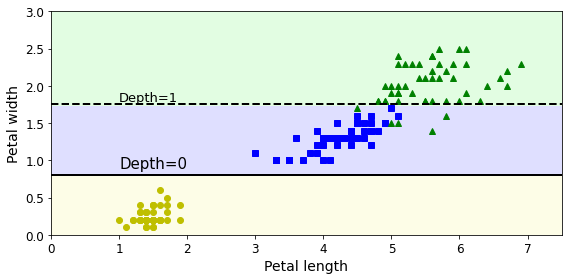


#### **Sensitivity to training set rotation**
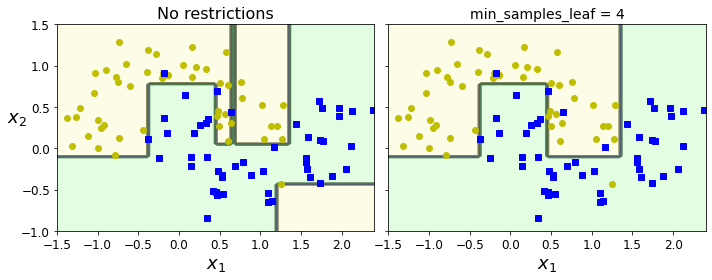



<div class = "alert alert-warning">


<p>The above figure shows two Decision Trees trained on the moons dataset. On the left the Decision Tree is trained with the default hyperparameters, and on the right it’s trained with min_samples_leaf = 4. It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.</p>
</div>